### <center> Hypothesis III: Economy (GDP: Gross Domestic Product) vs House Price Index(HPI)
GDP Data Source : https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG?locations=GB

In [3]:
#importing various libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from pandas.plotting import lag_plot
from statsmodels.tsa.api import VAR
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the excel file which contains GDP data
df_gdp = pd.read_excel(r'C:/Users/hp/dissertation/Datasets/GDP.xls',sheet_name="Sheet1")
df_gdp.head()

,GDP_growth_annual%,Year
0,5.441083,1968
1,1.924097,1969
2,6.317907,1970
3,3.504717,1971
4,4.321668,1972


In [5]:
# checking the statistics 
df_gdp.describe()

,GDP_growth_annual%,Year
count,54.000000,54.000000
mean,2.242827,1994.500000
std,2.725545,15.732133
min,-9.270411,1968.000000
25%,1.726463,1981.250000
50%,2.473791,1994.500000
75%,3.630456,2007.750000
max,7.441273,2021.000000


We can see from the above table , that maximum GDP is 7.44 whereas the minium is -9.27 with a mean of 2.24 and standard deviation of 2.73

In [6]:
#checking the dataset year
print("Starting year of GDP data :",df_gdp.Year.min())
print("Ending year of GDP data :",df_gdp.Year.max())

Starting year of GDP data : 1968
Ending year of GDP data : 2021


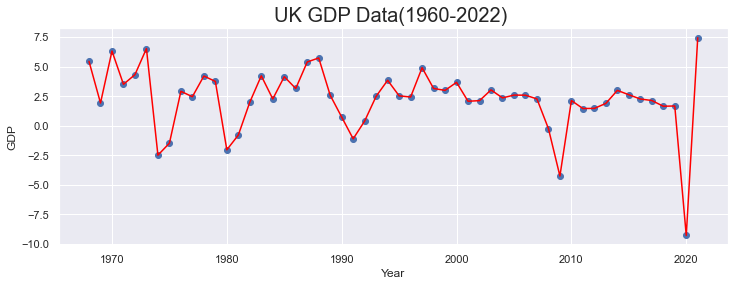

In [7]:
#plotting the GDP data
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,4))
sns.lineplot(data = df_gdp, x='Year',y='GDP_growth_annual%',err_style='bars',color='red')
plt.scatter(df_gdp['Year'],df_gdp['GDP_growth_annual%'])
plt.title("UK GDP Data(1960-2022) ",fontdict={'fontsize':20})
plt.xlabel("Year")
plt.ylabel('GDP')
plt.show()

We can see that there was a dip around 2008 due to financial crisis and in 2020 due to COVID-19.
### UK HPI Data

In [8]:
#importing the dataset for HPI 
df_HPI = pd.read_csv(r'C:/Users/hp/dissertation/Datasets/Indices-2022-05_ONS.csv')
df_HPI.head()

,Date,Region_Name,Area_Code,Index
0,1968-04-01,England,E92000001,1.680067
1,1968-04-01,Scotland,S92000003,2.108087
2,1968-04-01,Northern Ireland,N92000001,3.300420
3,1968-04-01,Wales,W92000004,2.119327
4,1968-04-01,West Midlands Region,E12000005,2.097808


In [9]:
# Since , we want for the United Kingdom , we would require to filter the region_name to united kingdom
df_HPI = df_HPI[df_HPI.Region_Name == 'United Kingdom']
df_HPI.head()

,Date,Region_Name,Area_Code,Index
9,1968-04-01,United Kingdom,K02000001,1.885299
19,1968-05-01,United Kingdom,K02000001,1.885299
29,1968-06-01,United Kingdom,K02000001,1.885299
39,1968-07-01,United Kingdom,K02000001,1.949207
49,1968-08-01,United Kingdom,K02000001,1.949207


In [10]:
# we require only date and index
df_HPI = df_HPI[['Date','Index']]
df_HPI.head()

,Date,Index
9,1968-04-01,1.885299
19,1968-05-01,1.885299
29,1968-06-01,1.885299
39,1968-07-01,1.949207
49,1968-08-01,1.949207


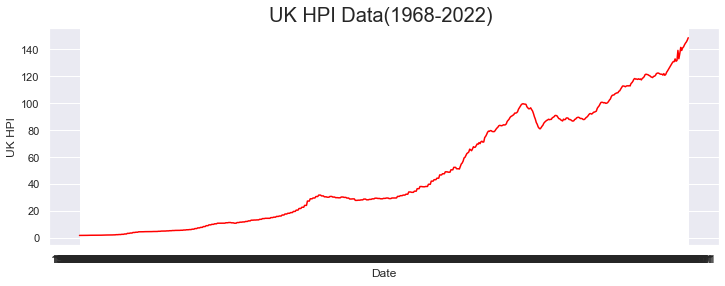

In [11]:
#plotting the UK HPI data
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,4))
sns.lineplot(data = df_HPI, x='Date',y='Index',err_style='bars',color='red')
plt.title("UK HPI Data(1968-2022) ",fontdict={'fontsize':20})
plt.xlabel("Date")
plt.ylabel('UK HPI')
plt.show()

In [12]:
#the GDP data is yearly thus , making the HPI data to yearly data
df_HPI['Date'] = pd.to_datetime(df_HPI['Date'])
df_HPI.set_index('Date',inplace=True)
df_HPI =df_HPI.resample('A').last()
df_HPI.reset_index(inplace=True)
df_HPI['year'] = df_HPI['Date'].dt.year
df_HPI.drop('Date',axis=1,inplace=True)
df_HPI.head()

,Index,year
0,1.938556,1968
1,2.045070,1969
2,2.183538,1970
3,2.545686,1971
4,3.653432,1972


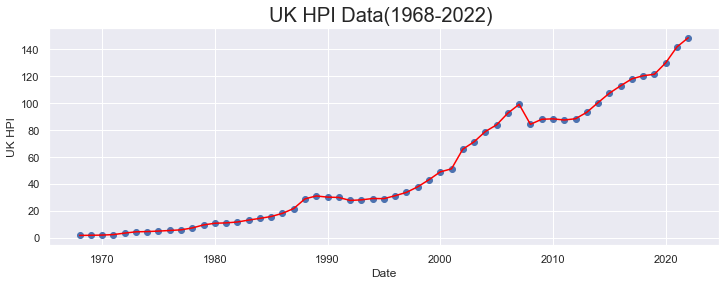

In [13]:
#plotting the UK HPI data yearly
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,4))
sns.lineplot(data = df_HPI, x='year',y='Index',err_style='bars',color='red')
plt.scatter(df_HPI['year'],df_HPI['Index'])
plt.title("UK HPI Data(1968-2022) ",fontdict={'fontsize':20})
plt.xlabel("Date")
plt.ylabel('UK HPI')
plt.show()

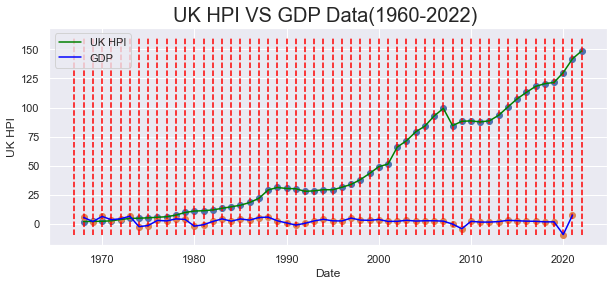

In [14]:
#plotting the the time series together

year_lst = range(1967,2023)
fig, ax = plt.subplots(figsize=(10, 4))
ax.vlines([year_lst], -10, 160, linestyles='dashed', colors='red')
sns.lineplot(data = df_HPI, x='year',y='Index',err_style='bars',color='green',ax=ax,label='UK HPI')
plt.scatter(df_HPI['year'],df_HPI['Index'])
sns.lineplot(data = df_gdp, x='Year',y='GDP_growth_annual%',err_style='bars',color='blue',ax=ax, label='GDP')
plt.scatter(df_gdp['Year'],df_gdp['GDP_growth_annual%'])
plt.title("UK HPI VS GDP Data(1960-2022) ",fontdict={'fontsize':20})
plt.xlabel("Date")
plt.ylabel('UK HPI')
plt.legend()
plt.show()

#### Performing Granger-Causality Test
Source :https://rishi-a.github.io/2020/05/25/granger-causality.html<br/>
The Granger Causality test is used to determine whether or not one time series is useful for forecasting another.
This test uses the following null and alternative hypotheses:

<B>Null Hypothesis (H0): Time series GDP does not Granger-cause time series HPI<B/>

<B>Alternative Hypothesis (HA): Time series GDP Granger-causes time series HPI<B/>
    
The term “Granger-causes” means that knowing the value of time series x at a certain lag is useful for predicting the value of time series y at a later time period.This test produces an F test statistic with a corresponding p-value. If the p-value is less than a certain significance level (i.e. α = .05), then we can reject the null hypothesis and conclude that we have sufficient evidence to say that time series x Granger-causes time series y.

In [16]:
df_all = pd.DataFrame()
df_all[['Year','GDP']] = df_gdp[['Year','GDP_growth_annual%']]
df_all['HPI']=df_HPI[['Index']]
df_all.set_index('Year',inplace=True)
df_all.head()

,GDP,HPI
Year,,
1968,5.441083,1.938556
1969,1.924097,2.045070
1970,6.317907,2.183538
1971,3.504717,2.545686
1972,4.321668,3.653432


Step 1: Test each of the time-series to determine their order of integration. Ideally, this should involve using a test (such as the ADF test) for which the null hypothesis is non-stationarity.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


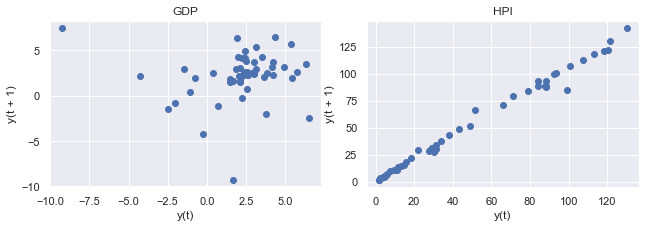

In [17]:
#plotting the lag_plots for GDP and HPI
fig,axes = plt.subplots(1, 2, figsize=(9, 3))
fig.tight_layout()
lag_plot(df_all['GDP'], ax=axes[0])
axes[0].set_title('GDP')
lag_plot(df_all['HPI'], ax=axes[1])
axes[1].set_title('HPI')
plt.show()

HPI chart shows high autocorrelation while GDP data shows low autocorrelation.

In [18]:
# differencing the data
df1 = df_all.copy()
df_all['GDP'] = df_all['GDP']- df_all['GDP'].shift(1)
df_all['HPI'] = df_all['HPI']- df_all['HPI'].shift(1)
df_all = df_all.dropna()
df_all.head()

,GDP,HPI
Year,,
1969,-3.516987,0.106514
1970,4.393810,0.138468
1971,-2.813189,0.362148
1972,0.816950,1.107746
1973,2.202181,0.958627


In [19]:
#defining a function for dicky fuller test
def adfuller_test(columns):
    result=adfuller(columns)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [20]:
adfuller_test(df_all['GDP'])

ADF Test Statistic : -4.512369900633507
p-value : 0.00018676364320925417
#Lags Used : 9
Number of Observations Used : 43
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [21]:
adfuller_test(df_all['HPI'])

ADF Test Statistic : -5.084360078035213
p-value : 1.5070484798456902e-05
#Lags Used : 0
Number of Observations Used : 52
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### We can see from above tests that ADF Null Hypothesis is rejected: thus data is stationary.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


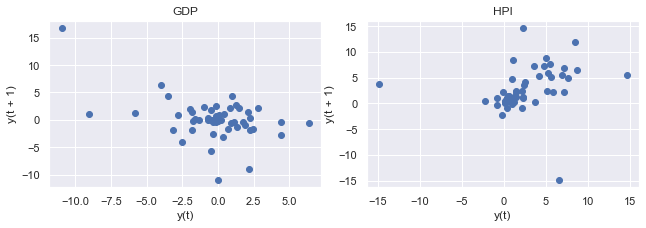

In [22]:
#plotting the lag_plots for GDP and HPI
fig,axes = plt.subplots(1, 2, figsize=(9, 3))
fig.tight_layout()
lag_plot(df_all['GDP'], ax=axes[0])
axes[0].set_title('GDP')
lag_plot(df_all['HPI'], ax=axes[1])
axes[1].set_title('HPI')
plt.show()

Moreover , the above lag plots give confirmation that the data is stationary

Step 2: Let the maximum order of integration for the group of time-series be m. So, if there are two time-series and one is found to be I(1) and the other is I(2), then m = 2. If one is I(0) and the other is I(1), then m = 1, etc.
Result: We saw above that for our case m = 1

Step 3: Set up a VAR model in the levels of the data, regardless of the orders of integration of the various time-series. Most importantly, you must not difference the data, no matter what you found at Step 1.//

Step 4: Determine the appropriate maximum lag length for the variables in the VAR, say p, using the usual methods. Specifically, base the choice of p on the usual information criteria, such as AIC, SIC.

In [23]:
# applying VAR model and finding the AIC, BIC
df1 = df1.dropna()
model = VAR(df1) #recall that rawData is w/o difference operation
for i in range(1,13):
    result = model.fit(i)
    try:
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        
    except:
        continue

Lag Order = 1
AIC :  4.825197886745501
BIC :  5.048249801487251
Lag Order = 2
AIC :  4.760587960142102
BIC :  5.1358271367923765
Lag Order = 3
AIC :  4.8534926492038375
BIC :  5.383797724853652
Lag Order = 4
AIC :  4.965558476541121
BIC :  5.653886758495254
Lag Order = 5
AIC :  5.112877293516746
BIC :  5.962265998790905
Lag Order = 6
AIC :  5.211353535917137
BIC :  6.224920750158912
Lag Order = 7
AIC :  5.174388548711999
BIC :  6.355333826399271
Lag Order = 8
AIC :  5.312771034518859
BIC :  6.664375544967321
Lag Order = 9
AIC :  5.444010399509371
BIC :  6.969636501982086
Lag Order = 10
AIC :  5.606647424386285
BIC :  7.309737529490079
Lag Order = 11
AIC :  5.4534257273435784
BIC :  7.337500269713436
Lag Order = 12
AIC :  5.537390410971767
BIC :  7.606044718451967


Result: The lag-order p = 2 on the basis of Akaike Information Criterion (AIC)

In [24]:
#perform Granger-Causality test
grangercausalitytests(df1[['GDP', 'HPI']], maxlag=[2])


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.5527  , p=0.0014  , df_denom=47, df_num=2
ssr based chi2 test:   chi2=16.7123 , p=0.0002  , df=2
likelihood ratio test: chi2=14.4916 , p=0.0007  , df=2
parameter F test:         F=7.5527  , p=0.0014  , df_denom=47, df_num=2


{2: ({'ssr_ftest': (7.552668462966429, 0.001431429587194122, 47.0, 2),
   'ssr_chi2test': (16.712287662734227, 0.00023494859055053405, 2),
   'lrtest': (14.491584867393414, 0.000713168789823195, 2),
   'params_ftest': (7.552668462966302, 0.0014314295871942601, 47.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

The F test statistic turns out to be 4.4719 and the corresponding p-value is 0.0168.Since the p-value is less than .05,we can reject the null hypothesis of the test and <b>conclude that knowing the GDP is useful for predicting the future HPI.</b>